<a href="https://colab.research.google.com/github/bakudbilla/Formative_1_-Sound_Clustering_HMMs/blob/main/Bernice_Awinpang_Akudbilla__Sound_clustering_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Unlabeled Sound Data

## Assignment

Complete the tasks in the notebook and document your observations in the markdown cells.

In [2]:
#Make allNecessary Imports
import os
import librosa
import librosa.display
from glob import glob
import IPython.display as ipd
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the Data
audio_files = glob("/content/drive/MyDrive/Colab Notebooks/Sound_Clustering/unlabelled_sounds (1)/unlabelled_sounds/*.wav")


In [5]:
ipd.Audio(audio_files[0])

In [6]:
ipd.Audio(audio_files[10])

In [7]:
ipd.Audio(audio_files[20])

# LOADING DATA AND EXTRACTING FEATURES

I extracted the audio features from .wav files in the google drive folder by converting each file into a Mel spectrogram using 128 Mel frequency bands. For each audio file, it loads the **waveform (y)** while preserving its original **sampling rate (sr)**, computes the Mel spectrogram to represent how energy is distributed across frequency over time, and then converts this to a **decibel (log)** scale for better perceptual representation. It then averages the log-mel spectrogram produce a fixed-length feature vector, which is stored in the features list and converted into a NumPy array called **features_array**.

In [8]:
unlabelled_data_path = "/content/drive/MyDrive/Colab Notebooks/Sound_Clustering/unlabelled_sounds (1)/unlabelled_sounds/"

features = []
# Extract the Features from the audios
for file in os.listdir(unlabelled_data_path):
    file_path = os.path.join(unlabelled_data_path, file)
    y, sr = librosa.load(file_path, sr=None)  # sr is the sampling rate
    # Computing the Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    features.append(np.mean(log_mel_spectrogram, axis=1))

features_array = np.array(features)

/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1852
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2014
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2037
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1953
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1567
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1858
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

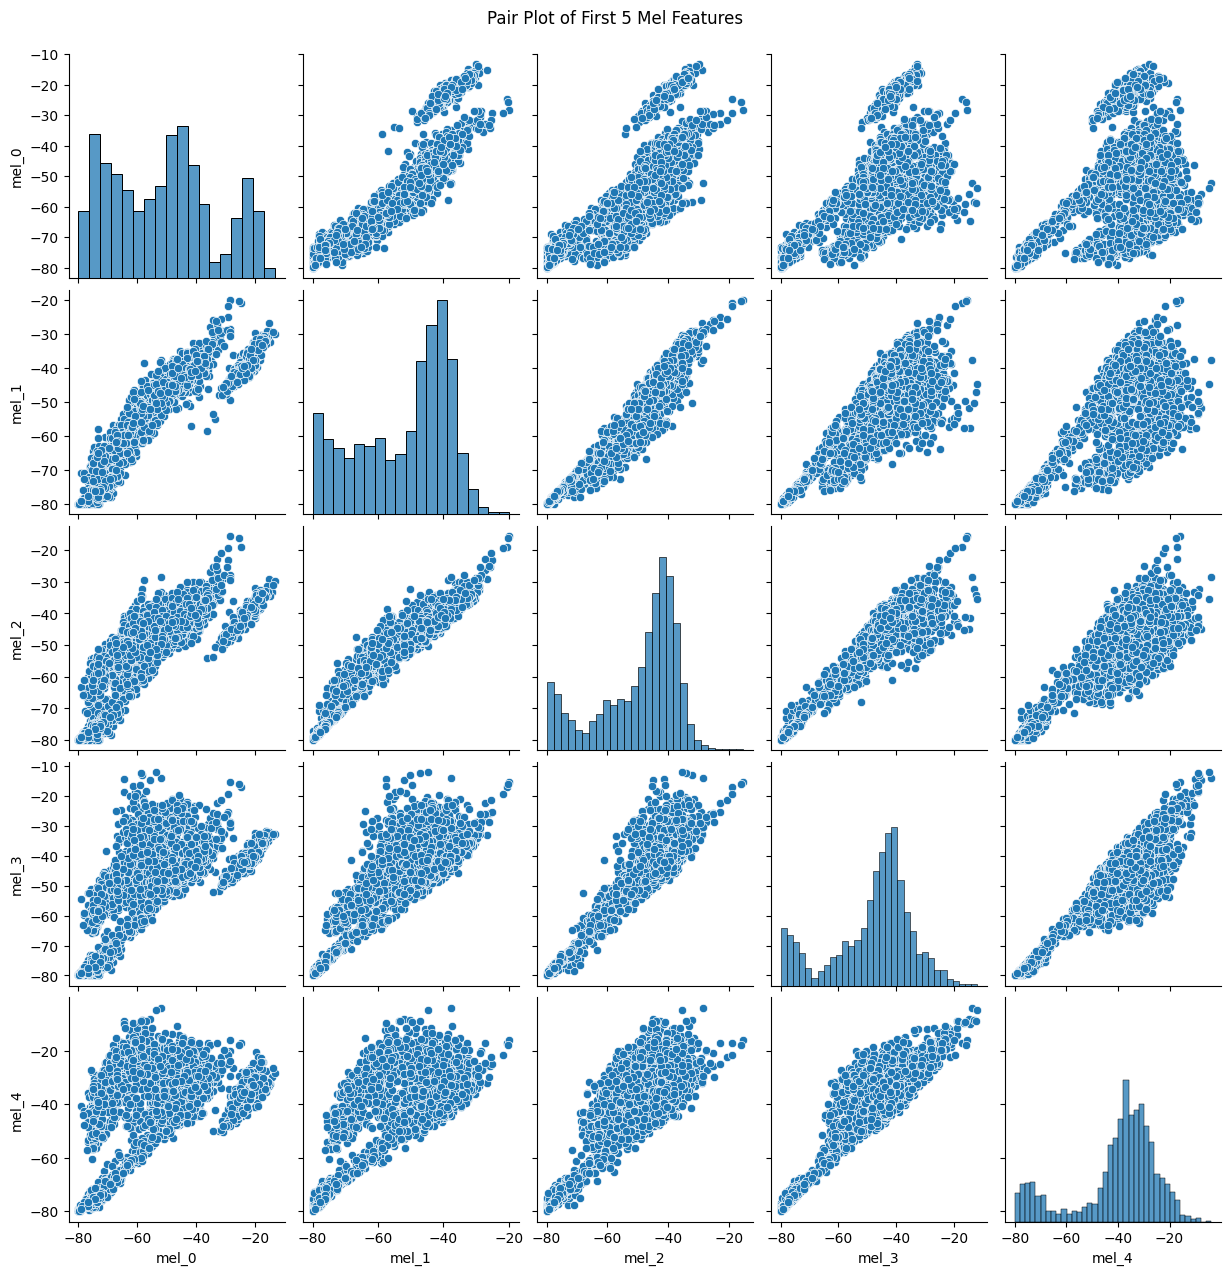

In [9]:
#creating a dataframe subset to be used to plot the pair plots
df_subset = pd.DataFrame(features_array[:, :5], columns=[f'mel_{i}' for i in range(5)])
# Create a pair plot
sns.pairplot(df_subset)
plt.suptitle("Pair Plot of First 5 Mel Features", y=1.02)
plt.savefig("Pair Plot of First 5 Mel Features")
plt.show()

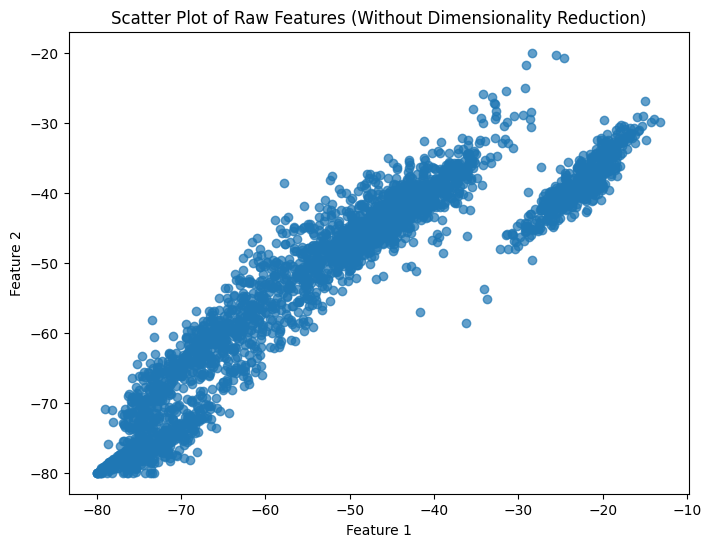

In [10]:
# Creating Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(features_array[:, 0], features_array[:, 1], alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Raw Features (Without Dimensionality Reduction)")
plt.savefig("Scatter Plot of Raw Features (Without Dimensionality Reduction)")
plt.show()

### Why is dimensionality reduction important?
From the **pairplot and scatter plot visualizations**, it is clear that the data is widely spread out, with several features showing overlapping patterns and high correlations. This spread suggests that some features may be introducing noise and unnecessary complexity, making it difficult to identify clear patterns or clusters. Such complexity can limit the model’s ability to generalize and extract meaningful insights from the data.

Another problem is **multicollinearity**, several Mel features, especially in the pairplot, display strong linear relationships, indicating redundancy. This makes it harder for the model to distinguish between unique sources of variation, leading to inefficient learning. Additionally, the visualizations hint at differences in feature scales and variance, where some features appear to dominate due to larger ranges. This imbalance can distort clustering results, causing certain features to overshadow others during analysis.

Dimensionality reduction helps solve these issues by removing redundant information, minimizing noise, and retaining only the most relevant components of the data. By reducing the number of features, it simplifies the dataset, improves computational efficiency, and enhances the visibility of hidden patterns—making clustering and further analysis more accurate and interpretable.


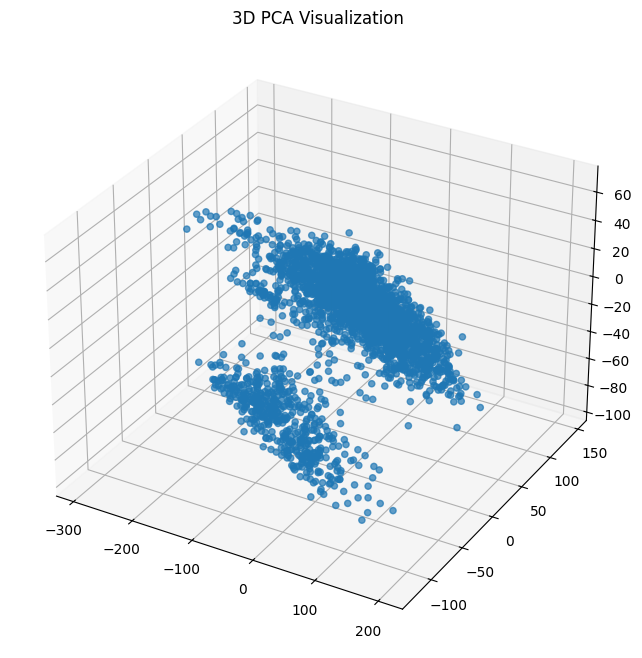

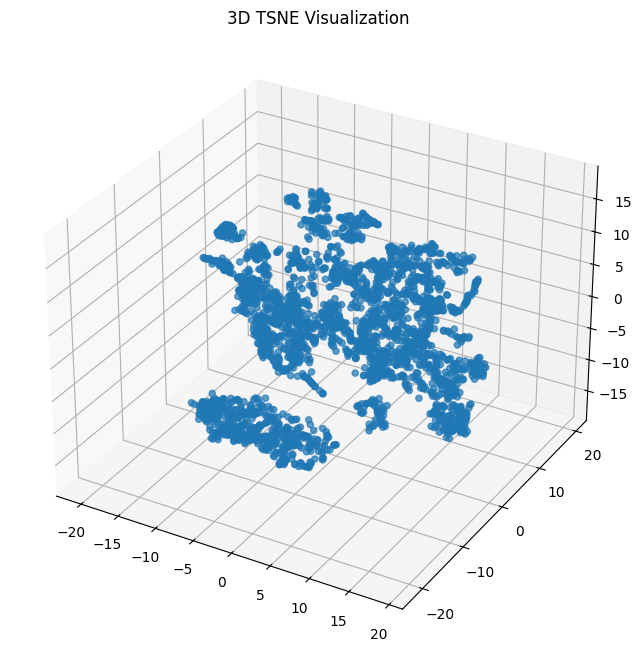

In [ ]:
# Apply PCA (3 components)
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features_array)

# Apply t-SNE (3 components)
tsne = TSNE(n_components=3, perplexity=30, random_state=42)
features_tsne = tsne.fit_transform(features_array)

# 3D Visualization goes here
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], alpha=0.7)
ax.set_title("3D PCA Visualization")
plt.savefig("3D PCA Visualization")
plt.show()

print('\n')


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features_tsne[:, 0], features_tsne[:, 1], features_tsne[:, 2], alpha=0.7)
ax.set_title("3D TSNE Visualization")
plt.savefig("3D TSNE Visualization")
plt.show()



### Which method (PCA or t-SNE) provides better separability of clusters and why?
From the visualizations, the  t-SNE visualisations gives better cluster separation than the PCA diagram . In the t-SNE plot, the points are grouped into clearly separated clusters, showing that it captures local patterns in the data well. This makes it easier to spot possible groupings or structures. In contrast, the PCA plot looks more spread out, with overlapping areas and less clear separation. This is because PCA keeps the overall variance of the data but doesn’t focus on the local structure like t-SNE does. This implies  t-SNE is more effective for visualizing clusters.

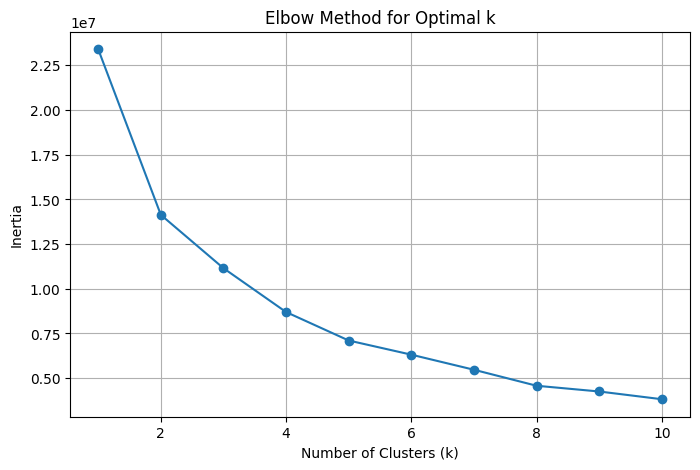

In [ ]:
# Optimize number of clusters using Elbow Method
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_pca)  # Use PCA-reduced data or original features
    inertias.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


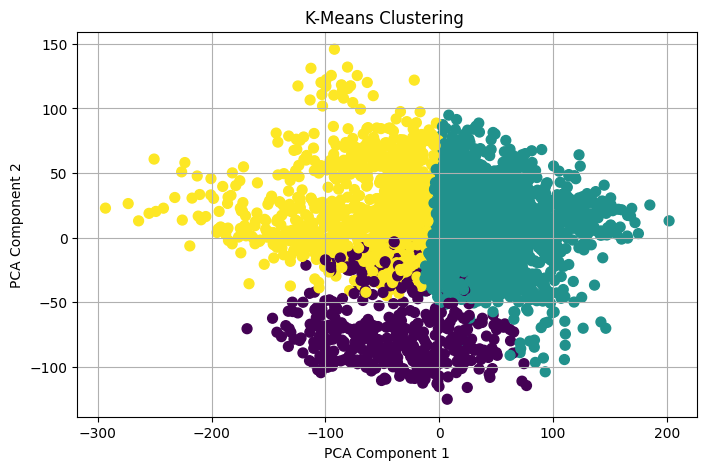

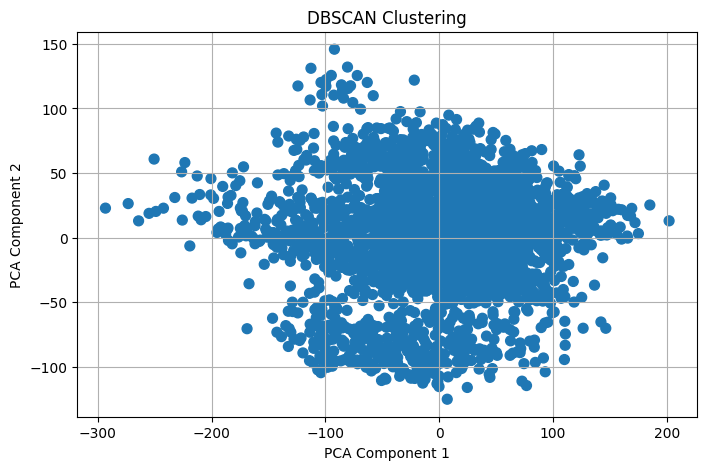

In [ ]:
# Select optimal K based on elbow method (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(features_array)

# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=3)
dbscan_labels = dbscan.fit_predict(features_array)

# Reduce to 2D using PCA for visualization
pca_2d = PCA(n_components=2)
features_2d = pca_2d.fit_transform(features_array)

# Scatter Plot for K-Means Clusters
plt.figure(figsize=(8, 5))
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title(f'K-Means Clustering ')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.savefig("K-Means Clustering")
plt.show()

print('\n')

# Scatter Plot for DBSCAN Clusters
plt.figure(figsize=(8, 5))
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=dbscan_labels, cmap='tab10', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.savefig("DBSCAN Clustering")
plt.show()


In [ ]:
# Evaluate clustering
kmeans_silhouette = silhouette_score(features_array, kmeans_labels)
kmeans_db_index = davies_bouldin_score(features_array, kmeans_labels)

if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(features_array, dbscan_labels)
    dbscan_db_index = davies_bouldin_score(features_array, dbscan_labels)
else:
    dbscan_silhouette = None
    dbscan_db_index = None

print(f"K-Means - Silhouette Score: {kmeans_silhouette:.4f}, Davies-Bouldin Index: {kmeans_db_index:.4f}")
if dbscan_silhouette is not None:
    print(f"DBSCAN - Silhouette Score: {dbscan_silhouette:.4f}, Davies-Bouldin Index: {dbscan_db_index:.4f}")
else:
    print("DBSCAN failed to form meaningful clusters.")


K-Means - Silhouette Score: 0.2519, Davies-Bouldin Index: 1.4346
DBSCAN failed to form meaningful clusters.


### Discuss the results (max 5 lines)

The K-Means clustering achieved a **Silhouette Score of 0.2519**, which indicates average clustering performance, clusters are moderately separated but not highly compact. The **Davies-Bouldin Index of 1.4346** also reflects reasonable separation, though not optimal.The plot shows three distinguishable clusters, showing that **K-Means** was able to detect structure in the PCA-reduced feature space. On the other hand, the DBSCAN clustering failed to form meaningful clusters, due to overlapping data points and varying densities, as shown in the plot where almost all points form a single dense group without clear separation.

From the evaluation metrics and the visualizations, K-Means performed better than DBSCAN.




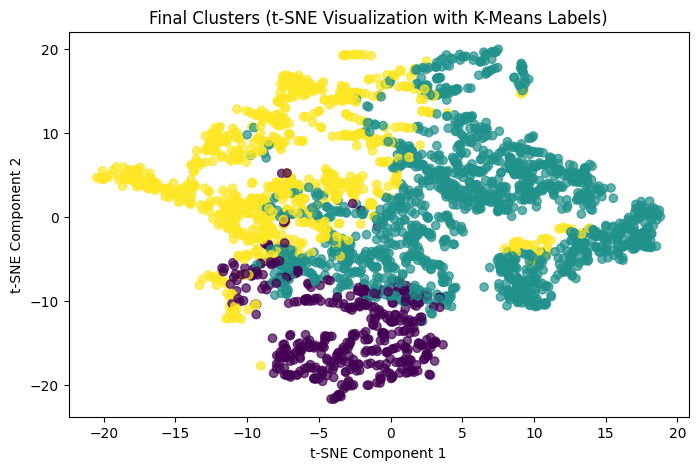

In [ ]:
# Final visualization using t-SNE
plt.figure(figsize=(8, 5))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Final Clusters (t-SNE Visualization with K-Means Labels)")
plt.show()

### Final Analysis
- Explain why dimensionality reduction helped (or didn't) in clustering.
- Justify why certain clustering methods worked better.
- Relate findings to real-world clustering challenges.

Dimensionality reduction was essential in the clustering process because the original **Mel-frequency cepstral coefficient (MFCC)** features were highly correlated and widely spread, which made it difficult to identify clear groupings. Using techniques like **Principal Component Analysis (PCA) and t-SNE**, the high-dimensional data was transformed into a lower-dimensional space that preserved the most relevant patterns while removing noise and redundancy. This transformation not only simplified the data but also improved cluster visibility and model performance by focusing on the most informative features.

Between the clustering algorithms used, K-Means performed significantly better than DBSCAN. K-Means successfully identified moderately distinct clusters, supported by a **Silhouette Score of 0.2519** and a **Davies-Bouldin Index of 1.4346**, indicating that while the clusters were not perfectly compact, they were reasonably well-separated. In contrast, DBSCAN failed to detect meaningful clusters, likely because the dataset lacked the density-based structure that DBSCAN relies on. This shows that K-Means, which assumes evenly distributed, spherical clusters, was more compatible with the simplified structure produced by dimensionality reduction.

In real-world scenarios like audio and speech analysis, sound data is often high-dimensional and noisy, especially during data collection. This makes it difficult to cluster effectively without first applying dimensionality reduction techniques. Methods like PCA and t-SNE help clean up the data by removing noise and redundancy, revealing meaningful patterns that are crucial for clustering. These techniques are important in applications such as music genre classification, speaker identification, voice activity detection, and environmental sound recognition, where uncovering hidden structures directly impacts model accuracy and performance.